#### Probability Ratio Encoding

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic.csv', usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [2]:
# Replacing  NaN with 'Missing'
df['Cabin'].fillna('Missing', inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [3]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [4]:
df['Cabin'] = df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [5]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [9]:
prob_df = pd.DataFrame({'Survived': df.groupby(['Cabin'])['Survived'].mean()})
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [10]:
prob_df['Died'] = 1 - prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


In [11]:
prob_df['Probability_ratio'] = prob_df['Survived']/prob_df['Died']
prob_df

,Survived,Died,Probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [14]:
probability_encoded = prob_df['Probability_ratio'].to_dict()

In [15]:
df['Cabin_encoded'] = df['Cabin'].map(probability_encoded)
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274


In [16]:
Final Table
df[['Survived','Cabin_encoded']].head()

,Survived,Cabin_encoded
0,0,0.428274
1,1,1.458333
2,1,0.428274
3,1,1.458333
4,0,0.428274


## Finding Missing value using ML
1. For Categorical (numerical, object): Logistic Regression, SVM, Naive Bayes etc.
2. For Continuous Variable (numerical): Linear Regression, SVR etc.
3. Link: https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b

In [18]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic.csv', usecols=['Survived','Pclass','Fare','Age'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [20]:
train_df = df.dropna()
train_df.shape

(714, 4)

In [21]:
test_df = df[df.Age.isnull()]
test_df.shape

(177, 4)

In [40]:
train_x = train_df.drop('Age',axis=1)
train_y = train_df['Age']
print(train_x.shape,train_y.shape)

(714, 3) (714,)


In [23]:
test_x = test_df.drop('Age',axis=1)
print(test_x.shape)

(177, 3)


In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [31]:
train_scale = scale.fit_transform(train_x)
test_scale = scale.fit_transform(test_x)
print(train_scale.shape,test_scale.shape)

(714, 3) (177, 3)


In [47]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [48]:
lr.fit(train_scale, train_y)

LinearRegression()

In [49]:
y_pred = lr.predict(test_scale)
y_pred[:10]

array([28.66861083, 31.07942917, 21.39374095, 28.74394217, 21.35378168,
       28.70296896, 32.96226155, 21.36167336, 21.39348441, 28.70296896])

In [50]:
df.loc[df['Age'].isnull(),'Age'] = y_pred
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

<AxesSubplot:>

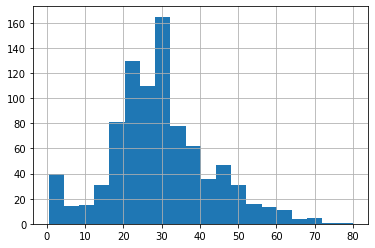

In [51]:
df['Age'].hist(bins=20)